# Part1: loading and inspect the dataset

## loading libraries

In [ ]:
#collab libraries
from google.colab import files
from zipfile import ZipFile


In [ ]:
# data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import random

In [89]:
# sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [168]:
import nltk
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk import pos_tag
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## loading the data files

In [4]:
up = files.upload()

Saving archive.zip to archive.zip


In [7]:

file = ZipFile("archive.zip")
file.extractall()
file.close()


In [8]:
df_train = pd.read_csv("Poem_classification - train_data.csv")
df_test = pd.read_csv("Poem_classification - test_data.csv")

## Inspect and visualise our data

In [9]:
df_train.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [10]:
df_train.describe()

,Genre,Poem
count,841,837
unique,4,785
top,Music,We walk through clouds wrapped in ancient symb...
freq,239,3


In [11]:
pd.unique(df_train["Genre"])

array(['Music', 'Death', 'Affection', 'Environment'], dtype=object)

Text(0.5, 1.0, 'Genre Histogram for training data set')

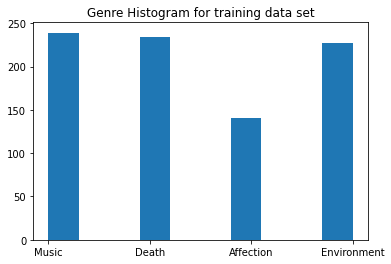

In [33]:
# visualise the distupution of the Genre column
plt.hist(df_train["Genre"])
plt.title("Genre Histogram for training data set")

Text(0.5, 1.0, 'Genre Histogram for testin data set')

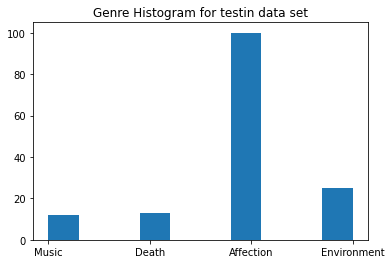

In [34]:
plt.hist(df_test["Genre"])
plt.title("Genre Histogram for testin data set")

In [32]:
# it seems our data split is not bad , except for Affection poams 
# lets visulise some random poams
for _ in range(5):
  rand= random.randint(0,len(df_train)-1)
  poem = df_train["Poem"][rand]
  genre = df_train["Genre"][rand]
  print("Genre: {}\n The poam:\n{}".format(genre, poem))

Genre: Environment
 The poam:
The heart on the breast of my mother Saint, sleeping on the wing of any number of blackbirds their feet sticking out the end of red pies.Danger is my jester, is the only thing keeping me here.He holds nothing to himself. In public he goes public.There is a man who takes blue silt to his brow and kisses
Genre: Environment
 The poam:
I didn’t mean to stay so lateor lie there in the grassall summer afternoon and thoughtlessas the kite of sun caught in the tree-limbsand the crimson field began to burn,then tilt way.I hung onhandily as night lit up the sky’s black skulland star-flakes fell as if forever—fat white petals of
Genre: Affection
 The poam:
You are not beautiful, exactly. You are beautiful, inexactly. You let a weed grow by the mulberry and a mulberry grow by the house. So close, in the personal quiet of a windy night, it brushes the wall and sweeps away the day till we sleep.A child said it, and it seemed true: "Things that are lost
Genre: Music
 The

## Solving the problem of the affection column 

In [43]:
print("vlaue counts for training dataset:" ),df_train["Genre"].value_counts(), print("\n the mean of the counts = {}".format(df_train["Genre"].value_counts().mean()))

vlaue counts for training dataset:

 the mean of the counts = 210.25


(None, Music          239
 Death          234
 Environment    227
 Affection      141
 Name: Genre, dtype: int64, None)

In [48]:
print("vlaue counts for testing dataset:") ,df_test["Genre"].value_counts(),print("\n the mean of the counts = {}".format(df_test["Genre"].value_counts().mean()))

vlaue counts for testing dataset:

 the mean of the counts = 37.5


(None, Affection      100
 Environment     25
 Death           13
 Music           12
 Name: Genre, dtype: int64, None)

In [70]:
# split the affection poems to add 87 poems to the training data
will_be_train = (df_test[df_test["Genre"]=="Affection"])[0:83]

In [71]:
will_be_test = (df_test[df_test["Genre"]=="Affection"])[83:]

In [106]:
df_train_new = pd.concat([df_train, will_be_train])

Text(0.5, 1.0, 'Genre Histogram for the new training data set')

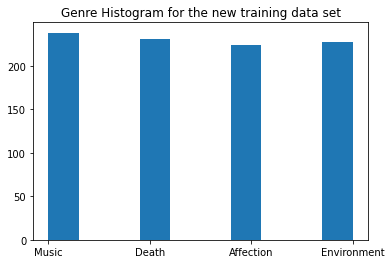

In [117]:
# inspect the new training dataset
plt.hist(df_train_new["Genre"])
plt.title("Genre Histogram for the new training data set")


In [78]:
# create a new test data set 
df_without_affection =df_test[df_test["Genre"]!="Affection"]

In [85]:
df_without_affection["Genre"].value_counts()

Environment    25
Death          13
Music          12
Name: Genre, dtype: int64

In [82]:
df_test_new = pd.concat([df_without_affection, will_be_test])

In [83]:
df_test_new["Genre"].value_counts()

Environment    25
Affection      17
Death          13
Music          12
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Genre Histogram for the new training data set')

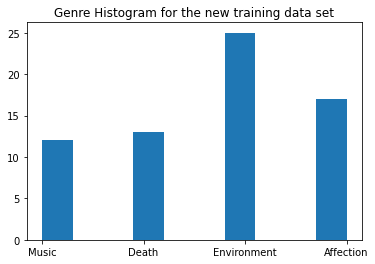

In [87]:
plt.hist(df_test_new["Genre"])
plt.title("Genre Histogram for the new training data set")

In [107]:
# checking na values
df_train_new.isna().sum(), df_test_new.isna().sum()


(Genre    0
 Poem     4
 dtype: int64, Genre    0
 Poem     0
 dtype: int64)

In [113]:
# we have 4 na values in training dataset
df_train_new = df_train_new.dropna() 

In [116]:
df_train_new.isna().sum(), len(df_train_new)

(Genre    0
 Poem     0
 dtype: int64, 920)

# Part2: Naive Bayes Models

In [118]:
train_inputs = df_train_new["Poem"]
test_inputs = df_test_new["Poem"]
train_y = df_train_new["Genre"]
test_y = df_test_new["Genre"]

## Creating the baseline  model

In [119]:
cb = CountVectorizer()
cb.fit(train_inputs,train_y)
train_x = cb.transform(train_inputs)
test_x = cb.transform(test_inputs)

In [120]:
nb = MultinomialNB()
nb.fit(train_x,train_y)

MultinomialNB()

In [127]:
baseline_scores = {"train": [nb.score(train_x,train_y)], "test": [nb.score(test_x,test_y)]}

In [128]:
baseline_scores

{'train': [0.9195652173913044], 'test': [0.3283582089552239]}

In [129]:
baseline_scores_df = pd.DataFrame(baseline_scores)

In [132]:
baseline_scores_df.index = ["baseline"]

In [136]:
baseline_scores_df.index.names = ["Models"]

In [160]:
baseline_scores

{'train': [0.9195652173913044], 'test': [0.3283582089552239]}

## Model1 : removeing stop words

In [138]:
cb_1 = CountVectorizer(stop_words="english")
cb_1.fit(train_inputs,train_y)
train_x = cb_1.transform(train_inputs)
test_x = cb_1.transform(test_inputs)

In [142]:
nb_1 = MultinomialNB()
nb_1.fit(train_x,train_y)

MultinomialNB()

In [144]:
model_1_scores = {"train": [nb_1.score(train_x,train_y)], "test": [nb_1.score(test_x,test_y)]}
model_1_scores_df = pd.DataFrame(model_1_scores)
model_1_scores_df.index = ["Model_1"]
model_1_scores_df.index.names = ["Models"]
model_1_scores_df

,train,test
Models,,
Model_1,0.927174,0.402985


## Model2 : using stemmer

In [154]:
# class for stem the docs
class stemmer:
  def __init__(self):
    self.ps = PorterStemmer
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [ps.stem(word) for word in tokens]


In [157]:
cb_2 = CountVectorizer(tokenizer= stemmer())
cb_2.fit(train_inputs,train_y)
train_x = cb_2.transform(train_inputs)
test_x = cb_2.transform(test_inputs)

In [158]:
nb_2 = MultinomialNB()
nb_2.fit(train_x,train_y)

MultinomialNB()

In [164]:
model_2_scores = {"train": [nb_2.score(train_x,train_y)], "test": [nb_2.score(test_x,test_y)]}
model_2_scores_df = pd.DataFrame(model_2_scores)
model_2_scores_df.index = ["Model_2 : using stemmer"]
model_2_scores_df.index.names = ["Models"]
model_2_scores_df
pd.concat([baseline_scores_df, model_1_scores_df, model_2_scores_df])
# worse than baseline

,train,test
Models,,
baseline,0.919565,0.328358
Model_1,0.927174,0.402985
Model_2 : using stemmer,0.909783,0.358209


## Model3 : using lemmetizer

In [178]:
wnl = WordNetLemmatizer()
wnl.lemmatize("ran")  , wnl.lemmatize("ran", pos="v")

('ran', 'run')

In [179]:
pos_tag(["run"])

[('run', 'VB')]

In [194]:
# we have to use pos to get correct lemma
# function to convert to pos_tag returns to pos
def lemma_pos(pos_tag):
  if pos_tag.startswith("N"):
    return "n"
  elif pos_tag.startswith("V"):
    return "v"
  elif pos_tag.startswith("J"):
    return "r"
  elif pos_tag.startswith("R"):
    return "r"
  else: return "n"

In [199]:
class lemmatize:
  def __call__(self,doc):
    tokens = word_tokenize(doc)
    word_dict = pos_tag(tokens)
    return [wnl.lemmatize(word,lemma_pos(tag)) for word,tag in word_dict]

In [200]:
cb_3 = CountVectorizer(tokenizer= lemmatize())
cb_3.fit(train_inputs,train_y)
train_x = cb_3.transform(train_inputs)
test_x = cb_3.transform(test_inputs)

In [201]:
nb_3 = MultinomialNB()
nb_3.fit(train_x,train_y)

MultinomialNB()

In [202]:
model_3_scores = {"train": [nb_3.score(train_x,train_y)], "test": [nb_3.score(test_x,test_y)]}
model_3_scores_df = pd.DataFrame(model_3_scores)
model_3_scores_df.index = ["Model_3 : using lemmatizer"]
model_3_scores_df.index.names = ["Models"]
model_3_scores_df
pd.concat([baseline_scores_df, model_1_scores_df, model_2_scores_df, model_3_scores_df])

,train,test
Models,,
baseline,0.919565,0.328358
Model_1,0.927174,0.402985
Model_2 : using stemmer,0.909783,0.358209
Model_3 : using lemmatizer,0.908696,0.358209


# model4: using bulit-in spilt 

In [204]:
def tokenize(doc):
  return doc.split()

In [205]:
cb_4 = CountVectorizer(tokenizer= tokenize)
cb_4.fit(train_inputs,train_y)
train_x = cb_4.transform(train_inputs)
test_x = cb_4.transform(test_inputs)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [206]:
nb_4 = MultinomialNB()
nb_4.fit(train_x,train_y)

MultinomialNB()

In [207]:
model_4_scores = {"train": [nb_4.score(train_x,train_y)], "test": [nb_4.score(test_x,test_y)]}
model_4_scores_df = pd.DataFrame(model_4_scores)
model_4_scores_df.index = ["Model_4 : using bulit-in split"]
model_4_scores_df.index.names = ["Models"]
model_4_scores_df
pd.concat([baseline_scores_df, model_1_scores_df, model_2_scores_df, model_3_scores_df, model_4_scores_df])

,train,test
Models,,
baseline,0.919565,0.328358
Model_1,0.927174,0.402985
Model_2 : using stemmer,0.909783,0.358209
Model_3 : using lemmatizer,0.908696,0.358209
Model_4 : using bulit-in split,0.925000,0.283582
